In [1]:
import numpy as np 
import matplotlib
import math


# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import skimage
import PIL
import scipy
import cv2
import os
%matplotlib inline

import matplotlib.image as mpimg
import scipy.signal as signal


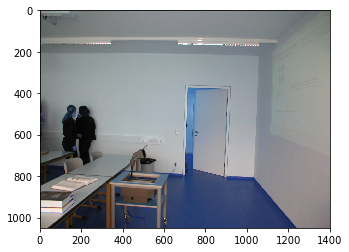

In [2]:
def displayImage(image):
 plt.imshow(image)
# plt.show()

image = cv2.imread('TheDoor.jpg')
displayImage(image)

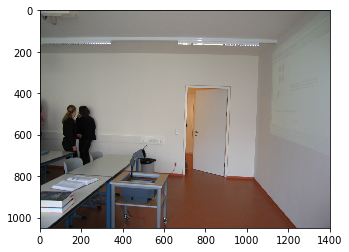

In [3]:
inFile = 'TheDoor.jpg'
img = plt.imread(inFile)
plt.imshow(img)

In [4]:
# Lets you interactively select a fixation point ("ginput")

# %matplotlib tk
# in_file = 'TheDoor.jpg'
# img = plt.imread(in_file)
# plt.imshow(img)

# print("Please click")
# selected = np.round(np.array(plt.ginput(1)))
# print("Clicked:", selected)

# img.shape



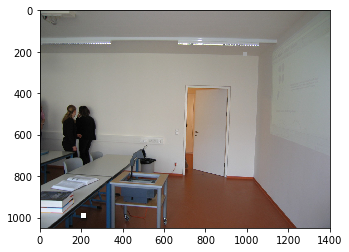

In [5]:
%matplotlib inline
img_adjusted = img.copy()
img_adjusted[200:220, 980:1000] = 160 # gray
img_adjusted[980:1000, 200:220] = 255 # white
plt.imshow(img_adjusted)

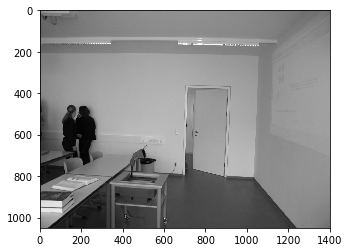

In [6]:
# Conversion to Grayscale
%matplotlib inline

from skimage.color import rgb2gray
img_g_float = rgb2gray(img)
plt.imshow(img_g_float, cmap="gray")




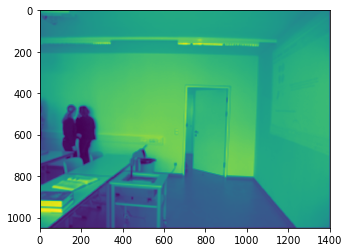

In [7]:
# Linear Filters - I: blurring

from scipy import ndimage

img.dtype

filter_matrix = np.ones((10,10))/100
img_filtered = ndimage.convolve(img_g_float, filter_matrix, mode='constant', cval=0.0)
plt.imshow(img_filtered)

[[ 0.52296039  1.57280275  2.10360627  2.11144941  2.11537098]
 [ 0.51903882  1.56103804  2.09184157  2.10360627  2.10752784]
 [ 0.          0.          0.          0.          0.00392157]
 [ 0.01176471  0.03137255  0.03529412  0.03529412  0.04313725]
 [ 0.00727765  0.02183294  0.03303216  0.03695373  0.03303216]
 [-0.00448706 -0.00953961 -0.00618353 -0.00618353 -0.01402667]]


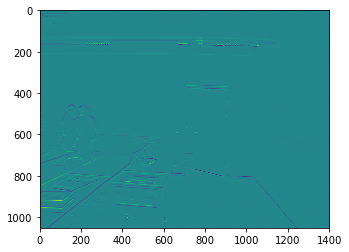

In [8]:
# Linear Filters - II: Edge Detection

Filter = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])
from scipy import ndimage
from scipy.signal import convolve2d
from scipy.ndimage import convolve

filtered = convolve2d(img_g_float, Filter.T)
filtered_b = convolve(img_g_float, Filter.T)
print(filtered[:6, :5])
plt.imshow(filtered)
# plt.imshow(filtered_b)

(1050, 1400)


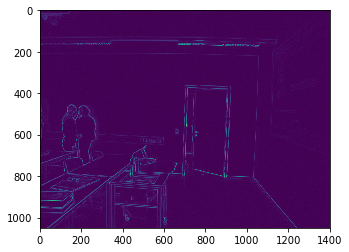

In [9]:
from skimage import filters
filtered = filters.sobel(img_g_float)
plt.imshow(filtered)
print(img_g_float.shape)

For my own reference...Receptive field functions
-------------------

The two dimensional gaussian function is used in image processing as blurring filter.
$$\phi(x,y) = \frac{1}{2\pi\sigma^2}\exp{(-\frac{1}{2\pi\sigma^2}(x^2+ y^2))}$$

For an *on-center cell*, illuminating the immediate surrounding excities the ganglion cell, and illuminating the surrounding area inhibits the cell. Mathematically, we can describe this behavior with a *Difference Of Gaussian (DOG)*-function:

$f(x;\sigma) = \frac{1}{\sigma_1\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_1^2} \right)-\frac{1}{\sigma_2\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_2^2} \right)$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/MexicanHat_Function.png" style="width: 600px;" align="left"/>

The values of $\sigma _{1}$ $\sigma _{2}$ have a ratio of approximately 1:1.6, but vary as a function of eccentricity.


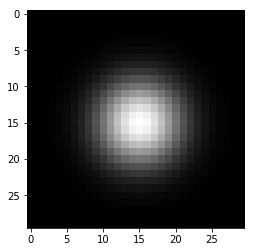

In [10]:
# The gaussian function is circular symmetric, leading to excitation of a centered pixel from nearby pixels in convolution.

def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))

"""make matrix from function"""
def receptiveFieldMatrix(func):
    h = 30 # height
    g = np.zeros((h,h)) # grid
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-h/2
            y = yi-h/2
            g[xi, yi] = func(x,y)
    return g

def plotFilter(show):
    g = receptiveFieldMatrix(show) 
    plt.imshow(g, cmap="gray")
    
plotFilter(lambda x,y:gaussian2D(x,y,4)) #standard deviation = 4

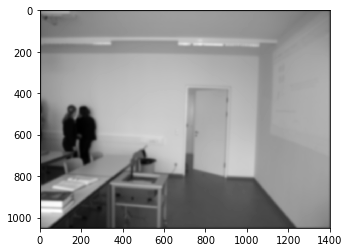

In [11]:
# Convolution is the process of applying the filter to the input, which is the image I(x,y) denoting the grey value of the pixel at the specified position.
# When applying the gaussian filter every neuron in the output layer is excited by nearby image neurons.

Img_Gaussian = signal.convolve(img_g_float,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,5)), mode='same')
imgplot = plt.imshow(Img_Gaussian, cmap="gray")


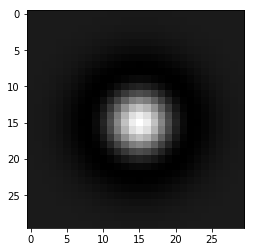

In [12]:
# Difference of Gaussians
# The mexican hat function is a difference of gaussians, which leads to an on-center, off-surround receptive field, found in retinal ganglion cells or LGN neurons. It can be seen as a basic edge detector.


def mexicanHat(x,y,sigma1): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma1*1.6)

plotFilter(lambda x,y: mexicanHat(x,y,3))

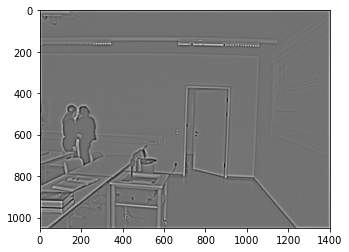

In [13]:
Img_MexicanHat = signal.convolve(img_g_float,receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,3)), mode='same')
imgplot = plt.imshow(Img_MexicanHat, cmap="gray")

Please click
Clicked: [[273. 441.]]


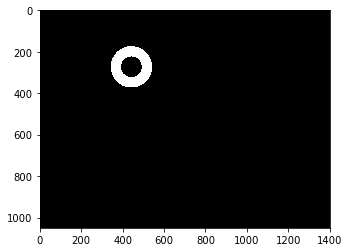

In [14]:
Zones = np.zeros(img.shape, dtype=np.uint8)

%matplotlib tk
# in_file = 'TheDoor.jpg'
# img = plt.imread(in_file)
plt.imshow(Zones)

print("Please click")
selected = np.round(np.array(plt.ginput(1)))
print("Clicked:", selected)

x_0 = selected[0][0]
y_0 = selected[0][1]


for x in range(0,img.shape[1]):
    for y in range(1,img.shape[0]):
        if(50<(np.sqrt((x-x_0)**2+(y-y_0)**2))<100):
            Zones[x,y]=255

plt.imshow(Zones)





In [15]:
print(selected)
selected[0][0]

[[273. 441.]]


273.0

In [16]:
img.shape
img.shape[0]

1050

Please click
Clicked: [[274. 789.]]
789.0
274.0
finished
(1050, 1400, 3) 776.0 789.0 1106.660291146294
Eccentricity Vector [31.61886546 15.80943273 10.53962182  7.90471637  6.32377309  5.26981091
  4.51698078  3.95235818  3.51320727  3.16188655]
RFS [0.65872636 0.32936318 0.21957545 0.16468159 0.13174527 0.10978773
 0.09410377 0.0823408  0.07319182 0.06587264]
Sigma Vector [0.52649408 0.58486675 0.65777605 0.75141272 0.87605377 1.05008539
 1.30990887 1.73886336 2.57634796 4.84998771]


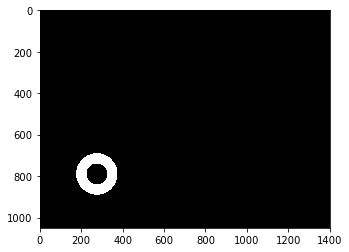

In [99]:
import numpy as np 
import matplotlib
import math


# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import skimage
import PIL
import scipy
import cv2
import os

import matplotlib.image as mpimg
import scipy.signal as signal

def displayImage(image):
    plt.imshow(image)
plt.show()

image = cv2.imread('TheDoor.jpg')
displayImage(image)

inFile = 'TheDoor.jpg'
img = plt.imread(inFile)
plt.imshow(img)
# plt.show()

Zones = np.zeros(img.shape, dtype=np.uint8)

print("Please click")
selected = np.round(np.array(plt.ginput(1)))

# ginput(n=1,timeout=30,show_clicks=True)

print("Clicked:", selected)

x_0 = selected[0][1]
y_0 = selected[0][0]

print(x_0)
print(y_0)
plt.close()

for x in range(0,img.shape[1]):
    for y in range(1,img.shape[0]):
        if(50<(np.sqrt((x-x_0)**2+(y-y_0)**2))<100):
            Zones[x,y]=255
            # print(x)
print('finished')

plt.imshow(Zones)
plt.show()


# fixation_point = np.round(np.array(plt.ginput(1)))
# # store the larger of the two distances from fixation point to left and right side of the image.
x_max = max(image.shape[0]-selected[0][0], selected[0][0])
# # store the larger of the two distances from fixation point to top and bottom of the image
y_max = max(image.shape[1]-selected[0][1], selected[0][1])
# # compute the largest distance inside the image starting from the fixation point
largest_distance = np.sqrt(x_max**2 + y_max**2)

print(image.shape, x_max, y_max, largest_distance)

eye_radius = 1.25
screen_height = 30

individual_zones = (largest_distance/10)*np.arange(1,11)

eccentricity_vector = largest_distance*(screen_height/(img.shape[0]))/np.arange(1,11)
print('Eccentricity Vector', eccentricity_vector)

display_length = 60

rfs = eye_radius*eccentricity_vector / display_length
print('RFS',rfs)

sigma_vector = (np.arctan(rfs/eye_radius))*10
sigma_vector = np.flipud(sigma_vector)
print('Sigma Vector',sigma_vector)




In [104]:
individual_zones = (largest_distance/10)*np.arange(1,11)
individual_zones[9]
largest_distance

1106.660291146294

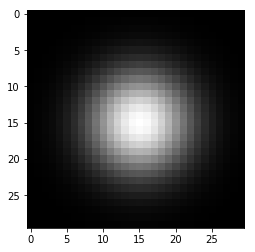

In [41]:
def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))

"""make matrix from function"""
def receptiveFieldMatrix(func):
    h = 30 # height
    g = np.zeros((h,h)) # grid
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-h/2
            y = yi-h/2
            g[xi, yi] = func(x,y)
    return g

def plotFilter(show):
    g = receptiveFieldMatrix(show) 
    plt.imshow(g, cmap="gray")

for i in range(len(sigma_vector)):
    plotFilter(lambda x,y:gaussian2D(x,y,sigma_vector[i]))

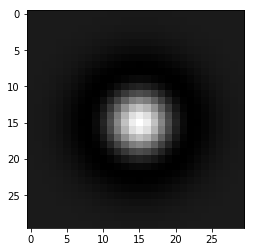

In [42]:
plotFilter(lambda x,y:gaussian2D(x,y,sigma_vector[1]))

Img_Gaussian = signal.convolve(img_g_float,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,5)), mode='same')
imgplot = plt.imshow(Img_Gaussian, cmap="gray")

# Difference of Gaussians
# The mexican hat function is a difference of gaussians, which leads to an on-center, off-surround receptive field, found in retinal ganglion cells or LGN neurons. It can be seen as a basic edge detector.

def mexicanHat(x,y,sigma1): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma1*1.6)

plotFilter(lambda x,y: mexicanHat(x,y,3))

(10, 1050, 1400)
generating zone 0
generating zone 1
generating zone 2
generating zone 3
generating zone 4
generating zone 5
generating zone 6
generating zone 7
generating zone 8
generating zone 9


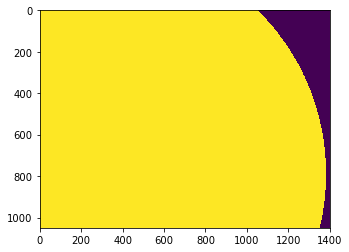

In [127]:
Zones = np.zeros((10,img.shape[0],img.shape[1]))
print(Zones.shape)

# for i in range(len(sigma_vector)):
for i in range(len(sigma_vector)):
    print("generating zone",i)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if(np.sqrt((x-x_0)**2+(y-y_0)**2)<(individual_zones[i])):
                Zones[i,x,y]=1    
plt.imshow(Zones[i])
    

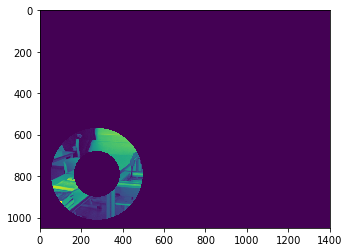

In [135]:
# for i in range(len(sigma_vector)):
i=1   
img_zoned = img[:,:,1]*(Zones[i]-Zones[i-1])
    
plt.imshow(img_zoned)

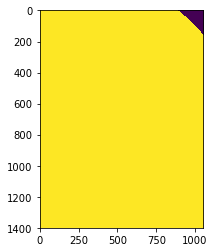

In [112]:
# eccentricity_vector.size
# eccentricity_vector[i-1]
plt.imshow(Zones[3]-Zones[4])

# # for i in range(len(sigma_vector)):
plt.imshow(Zones[8]-Zones[9])

# # Zones[0]
# # Zones[1]
# Zones[9]
# # np.min(Zones[4])


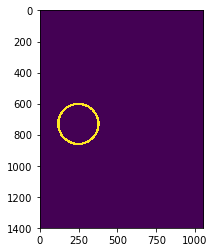

In [89]:
plt.imshow(Zones[7]-Zones[8])


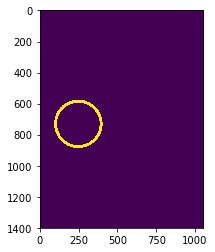

In [91]:
plt.imshow(Zones[6]-Zones[7])


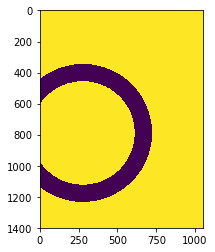

In [113]:
plt.imshow(Zones[2]-Zones[3])


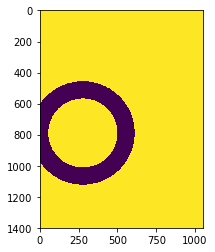

In [114]:
plt.imshow(Zones[1]-Zones[2])


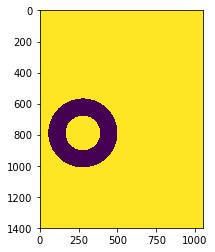

In [115]:
plt.imshow(Zones[0]-Zones[1])